In [86]:
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
stopwords =  [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", 
              "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", 
              "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", 
              "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", 
              "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", 
              "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", 
              "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's",
              "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll",
              "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", 
              "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",
              "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", 
              "yourself", "yourselves" ]

In [40]:
labels = []
sentences = []
with open("bbc-text.csv" , 'r') as csvfile:
    reader = csv.reader(csvfile , delimiter = ',')
    
    next(reader)
    
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token , " ")
            sentence = sentence.replace("  " , " ")
                      
        sentences.append(sentence)
    
print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [41]:
print(len(sentences))
print(len(labels))

2225
2225


In [42]:
### splitting data into training and test datasets

training_size = int(len(sentences)*0.8)

training_sentences = sentences[:training_size]
training_label = labels[:training_size]

test_sentences = sentences[training_size:]
test_label = labels[training_size:]

print(len(training_sentences))
print(len(training_label))
print(len(test_sentences))
print(len(test_label))

1780
1780
445
445


In [43]:
vocab_size = 1000
oov_token = "OOV"
truncate_type = "post"
padding_type = "post"
embedding_dim = 16
max_len = 120

In [45]:
tokenizer = Tokenizer(vocab_size ,  oov_token = "OOV")
tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_sequences = pad_sequences(training_sequence ,maxlen = max_len, padding = padding_type , truncating = truncate_type)

print(training_sequence.shape)
print(len(training_label))

(1780, 120)
1780


In [46]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(test_sequences , maxlen = max_len , truncating = truncate_type , padding = padding_type)

print(test_sequences.shape)
print(len(test_label))

(445, 120)
445


In [50]:
## tokenising labels

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_label)

training_label_sequences = tokenizer.texts_to_sequences(training_label)
test_label_sequences = tokenizer.texts_to_sequences(test_label)

labels_word_indexes = tokenizer.word_index
print(labels_word_indexes)

{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}


In [79]:
### now defining a model 

model = tf.keras.Sequential( [ tf.keras.layers.Embedding( vocab_size , embedding_dim , input_length = max_len) , 
                             tf.keras.layers.GlobalAveragePooling1D() , 
                             tf.keras.layers.Dense(24 , activation = "relu") , 
                             tf.keras.layers.Dense(6 , activation = "softmax")] )

model.compile(loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

In [80]:
epoch = 30

In [81]:
final_training_sequences = np.array(training_sequences)
final_test_sequences = np.array(test_sequences)

final_training_labels = np.array(training_label_sequences)
final_test_labels = np.array(test_label_sequences)

In [82]:
print(len(final_training_sequences[0]))
print(len(final_test_sequences[0]))
print(final_training_labels[0])
print(final_test_labels[0])

120
120
[5]
[4]


In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model.fit(final_training_sequences ,final_training_labels , validation_data = (final_test_sequences , final_test_labels ), epochs = epoch)

Epoch 1/30
56/56 [==============================] - 3s 20ms/step - loss: 1.7800 - accuracy: 0.2409 - val_loss: 1.7347 - val_accuracy: 0.3438
Epoch 2/30
56/56 [==============================] - 0s 8ms/step - loss: 1.7093 - accuracy: 0.3688 - val_loss: 1.6169 - val_accuracy: 0.4697
Epoch 3/30
56/56 [==============================] - ETA: 0s - loss: 1.5803 - accuracy: 0.49 - 0s 8ms/step - loss: 1.5714 - accuracy: 0.4951 - val_loss: 1.4344 - val_accuracy: 0.5618
Epoch 4/30
56/56 [==============================] - 0s 8ms/step - loss: 1.3614 - accuracy: 0.6112 - val_loss: 1.1976 - val_accuracy: 0.6742
Epoch 5/30
56/56 [==============================] - 0s 8ms/step - loss: 1.0959 - accuracy: 0.7827 - val_loss: 0.9661 - val_accuracy: 0.8000
Epoch 6/30
56/56 [==============================] - 0s 8ms/step - loss: 0.8557 - accuracy: 0.8625 - val_loss: 0.7862 - val_accuracy: 0.8472
Epoch 7/30
56/56 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.8766 - val_loss: 0.6566 

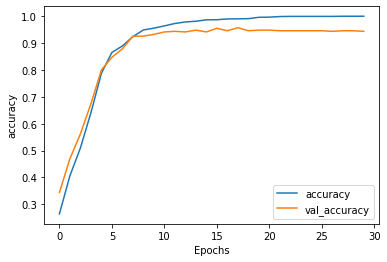

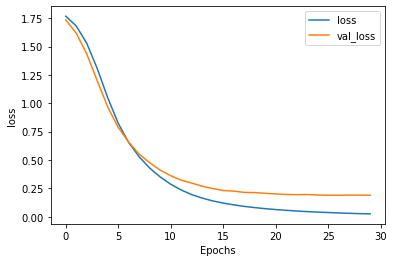

In [89]:
def plot_graph(history , str):
    plt.plot(history.history[str])
    plt.plot(history.history["val_"+str])
    plt.xlabel("Epochs")
    plt.ylabel(str)
    plt.legend([str  , "val_"+str])
    plt.show()
    
    
plot_graph(history , "accuracy")
plot_graph(history , "loss")

In [90]:
### we have created a model with 94% accuracy